In [ ]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# HIDDEN
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

# Visualizing Qualitative Data

For qualitative or categorical data, we most often use bar charts and dot charts. We will show how to create these plots using `seaborn` and the Titanic survivors dataset.

In [16]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

# Load the dataset
ti = sns.load_dataset('titanic').reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
df_interact(ti)

A Jupyter Widget

(891 rows, 15 columns) total


## Bar Charts

In `seaborn`, there are two types of bar charts. The first type uses the `countplot` method to count up the number of times each category appears in a column.

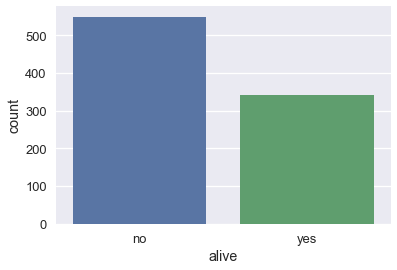

In [31]:
# Counts how many passengers survived and didn't survive and
# draws bars with corresponding heights
sns.countplot(x='alive', data=ti);

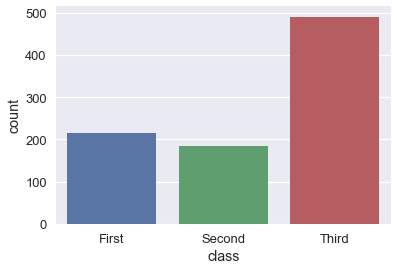

In [56]:
sns.countplot(x='class', data=ti);

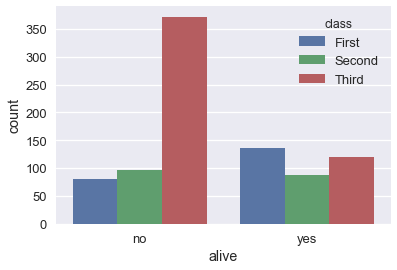

In [32]:
# As with box plots, we can break down each category further using color
sns.countplot(x='alive', hue='class', data=ti);

The `barplot` method, on the other hand, groups the DataFrame by a categorical column and plots the height of the bars according to the average of a numerical column within each group.

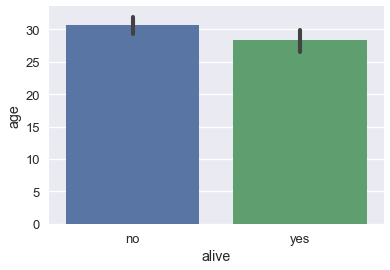

In [49]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.barplot(x='alive', y='age', data=ti);

The height of each bar can be computed by grouping the original DataFrame and averaging the `age` column:

In [50]:
ti[['alive', 'age']].groupby('alive').mean()

,age
alive,
no,30.626179
yes,28.343690


By default, the `barplot` method will also compute a bootstrap 95% confidence interval for each averaged value, marked as the black lines in the bar chart above. The confidence intervals show that if the dataset contained a random sample of Titanic passengers, the difference between passenger age for those that survived and those that didn't is not statistically significant at the 5% significance level.

These confidence intervals take long to generate when we have larger datasets so it is sometimes useful to turn them off:

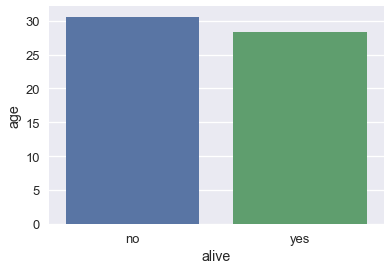

In [51]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

## Dot Charts

Dot charts are similar to bar charts. Instead of plotting bars, dot charts mark a single point at the end of where a bar would go. We use the `pointplot` method to make dot charts in `seaborn`. Like the `barplot` method, the `pointplot` method also automatically groups the DataFrame and computes the average of a separate numerical variable, marking 95% confidence intervals as vertical lines centered on each point.

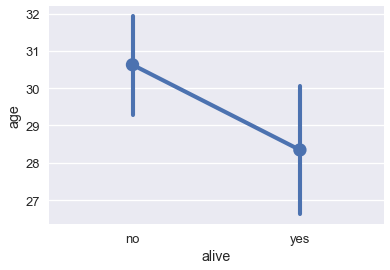

In [53]:
# For each set of alive/not alive passengers, compute and plot the average age.
sns.pointplot(x='alive', y='age', data=ti);

Dot charts are most useful when comparing changes across categories:

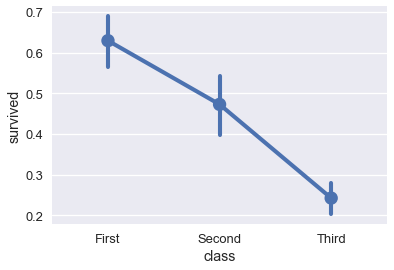

In [54]:
# Shows the proportion of survivors for each passenger class
sns.pointplot(x='class', y='survived', data=ti);

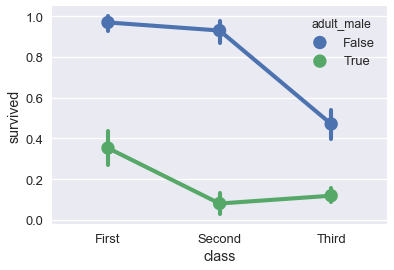

In [55]:
# Shows the proportion of survivors for each passenger class,
# split by whether the passenger was an adult male
sns.pointplot(x='class', y='survived', hue='adult_male', data=ti);